In [32]:
import numpy as np
import basix
import matplotlib.pyplot as plt
from basix import CellType, ElementFamily, LagrangeVariant, LatticeType
import jax_pn
import scipy.sparse as sp
from matplotlib.lines import Line2D
%load_ext autoreload
%autoreload 2
import jax
import jax.numpy as jnp
jax.config.update("jax_enable_x64", True)
from dataclasses import dataclass
from jax_pn.ADPN import GlobalSettings, MatrixSettings
from typing import Tuple, Dict, List
energy_groups = np.array([1.42907e+07, 1.00000e+06, 3.00000e+02, 1.00000e+01, 1.00000e-01])

data_dict = {
    'BackSupportingStructure': (
        np.array([14.77209636, 22.96845169, 54.47200191, 55.70180008]),
        np.array([[[ 1.24942070e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 2.25795981e+00,  2.28111810e+01,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  9.67748935e-02,  5.36368996e+01,  5.82725123e-03],
          [ 0.00000000e+00,  0.00000000e+00,  1.27187063e-01,  5.36495120e+01]],

         [[ 4.64231618e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-5.90813815e-02,  1.25643926e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -3.10286088e-02,  7.18068214e-01,  4.21791065e-03],
          [ 0.00000000e+00,  0.00000000e+00, -4.20798752e-02,  6.50962964e-01]],

         [[ 3.82012630e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 2.46871139e-02,  9.61673768e-01,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -8.16188014e-04,  1.28078481e-02,  2.23290762e-03],
          [ 0.00000000e+00,  0.00000000e+00,  1.08101746e-03, -3.08412536e-02]],

         [[ 2.08341971e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-1.70518233e-02,  7.25544490e-02,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  1.98970282e-04,  4.42525801e-02,  9.53335424e-04],
          [ 0.00000000e+00,  0.00000000e+00, -2.58888636e-05, -9.47098354e-03]],

         [[ 1.14886241e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-6.08587092e-03,  8.04990888e-02,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -1.44134581e-04, -9.98122892e-03,  4.12105430e-04],
          [ 0.00000000e+00,  0.00000000e+00, -3.62110923e-04, -1.28478212e-03]],

         [[ 5.59608630e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-2.94979824e-03,  3.66068753e-03,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  3.15193776e-05,  1.61003934e-02,  1.07907715e-04],
          [ 0.00000000e+00,  0.00000000e+00, -3.32111930e-04, -1.38009632e-02]]])
    ),
    'BreedingZone': (
        np.array([14.26520099, 33.2374296 , 46.22254283, 64.78551751]),
        np.array([[[ 1.27263811e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 2.68263604e+00,  3.22756614e+01,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  2.62800524e-01,  3.99674013e+01,  2.72044739e-03],
          [ 0.00000000e+00,  0.00000000e+00,  1.01872030e-01,  4.01261596e+01]],

         [[ 5.69873316e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 1.63175461e-02,  2.63653402e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -7.65089532e-02,  2.32328167e+00,  2.60787954e-03],
          [ 0.00000000e+00,  0.00000000e+00, -3.47139625e-02,  2.34997165e+00]],

         [[ 3.56722532e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 1.21476924e-02,  4.79992444e-01,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -5.16520833e-03,  4.91821817e-02,  2.39643838e-03],
          [ 0.00000000e+00,  0.00000000e+00,  2.52550546e-04,  4.81297066e-03]],

         [[ 2.00462038e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-2.95537183e-02,  4.83582428e-02,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -8.44775908e-04,  4.30629484e-02,  2.11016838e-03],
          [ 0.00000000e+00,  0.00000000e+00,  4.91736887e-04,  8.59957616e-03]],

         [[ 1.07216613e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-3.41887931e-03,  2.48490116e-02,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -4.63035411e-04,  1.62493885e-03,  1.77783070e-03],
          [ 0.00000000e+00,  0.00000000e+00, -4.66834907e-04, -9.65295073e-02]],

         [[ 4.94932801e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-2.56340688e-03,  1.77672427e-03,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  6.05788559e-05, -4.16034752e-03,  1.42673026e-03],
          [ 0.00000000e+00,  0.00000000e+00, -4.02825900e-06, -1.24300871e-01]]])
    ),
    'FirstWall': (
        np.array([15.28360321, 22.77599714, 57.37177834, 59.02067236]),
        np.array([[[ 1.35739102e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 2.47264631e+00,  2.27073391e+01,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  3.71920704e-02,  5.67913293e+01,  1.58972770e-02],
          [ 0.00000000e+00,  0.00000000e+00,  2.24933173e-02,  5.73402116e+01]],

         [[ 5.86238206e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 3.42093512e-02,  2.09849877e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -1.19380091e-02,  6.39940915e-01,  9.59542653e-03],
          [ 0.00000000e+00,  0.00000000e+00, -7.19817190e-03,  6.81404367e-01]],

         [[ 4.70132164e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 1.32212713e-02,  1.68460566e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  9.36025916e-05,  6.19816549e-02,  2.18780421e-03],
          [ 0.00000000e+00,  0.00000000e+00, -6.53698616e-05, -1.33153790e-01]],

         [[ 3.40430933e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-1.30475963e-02,  1.62770030e-01,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  1.23515743e-04,  1.18566666e-01, -2.29875869e-03],
          [ 0.00000000e+00,  0.00000000e+00,  6.21638288e-05,  3.16992612e-02]],

         [[ 2.48736323e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 8.42745972e-04,  1.42515822e-01,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -1.35970420e-04,  7.19430772e-02, -3.98712470e-03],
          [ 0.00000000e+00,  0.00000000e+00, -1.34316710e-04, -1.73357264e-01]],

         [[ 1.67694811e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 1.33650490e-04,  3.39274089e-02,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -5.25059140e-04, -7.96544962e-02, -3.85966729e-03],
          [ 0.00000000e+00,  0.00000000e+00,  3.03105854e-06, -6.13323799e-02]]])
    ),
    'Plasma': (
        np.array([1e-10, 1e-10, 1e-10, 1e-10]),        
        np.array([[[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],

         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],

         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],

         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],

         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],

         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]]])
    ),
    'TungstenArmor': (
        np.array([ 35.62796196,  55.19855355, 170.68293579,  97.62430527]),
        np.array([[[ 3.30981502e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 1.23786233e+01,  5.39927385e+01,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  3.81105370e-03,  1.44466525e+02,  1.33580218e-01],
          [ 0.00000000e+00,  0.00000000e+00,  6.34121092e-03,  4.26289394e+01]],

         [[ 1.74633605e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 1.42497322e-01,  7.97618562e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -8.29351683e-04,  4.65014502e-01,  3.91297892e-02],
          [ 0.00000000e+00,  0.00000000e+00, -1.87361531e-03,  1.75203903e+00]],

         [[ 1.43568377e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-5.63057553e-02,  3.44580388e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -3.07670565e-04, -7.27429723e-03,  1.95999255e-02],
          [ 0.00000000e+00,  0.00000000e+00, -5.14844961e-04,  3.37708238e-02]],

         [[ 1.19294691e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 7.00295216e-03,  1.13919178e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -1.43342420e-04, -4.30902562e-01,  4.93136604e-02],
          [ 0.00000000e+00,  0.00000000e+00,  1.46932234e-04,  7.67155835e-01]],

         [[ 9.75011766e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-2.51936726e-02,  3.19768662e-01,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  2.58680837e-04, -3.37626089e-01,  8.51612036e-03],
          [ 0.00000000e+00,  0.00000000e+00,  5.40664309e-04,  1.22455518e-01]],

         [[ 8.12408076e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-3.15909978e-03,  1.81364732e-02,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  4.02821611e-07,  4.95540772e-01, -3.56710582e-02],
          [ 0.00000000e+00,  0.00000000e+00, -5.33719860e-05,  1.27297386e-01]]])
    ),
    'VVShield': (
        np.array([ 26.47837879,  82.79717601, 113.04865901, 116.92695037]),
        np.array([[[ 1.75783052e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 8.75630464e+00,  7.68543671e+01,  0.00000000e+00,  0.00000000e+00],
          [ 8.45647746e-04,  5.53553434e+00,  9.66124369e+01,  1.62193366e-04],
          [ 4.10894125e-04,  1.83052937e-01,  1.55851386e+01,  1.01413898e+02]],

         [[ 7.36928750e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 2.66212746e+00,  2.54116983e+01,  0.00000000e+00,  0.00000000e+00],
          [ 9.70018107e-05,  2.14171330e+00,  3.00609316e+01,  1.18475218e-04],
          [ 9.56673483e-05,  1.72473635e-02,  6.58129813e+00,  3.19741496e+01]],

         [[ 5.66377710e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 7.93395421e-01,  1.13522342e+01,  0.00000000e+00,  0.00000000e+00],
          [-4.04915178e-04, -6.17607927e-01,  1.51388727e+01,  4.87926363e-05],
          [-1.72036114e-04, -8.69943812e-02, -1.67150354e+00,  1.47688177e+01]],

         [[ 3.01413788e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-1.10801549e+00,  1.41669720e+00,  0.00000000e+00,  0.00000000e+00],
          [-1.41630228e-04, -1.42752214e+00,  3.99017864e+00, -1.93967678e-05],
          [-1.30536057e-04, -2.43641338e-02, -3.94754939e+00,  3.17768329e+00]],

         [[ 1.57585804e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-9.00345813e-01, -1.18628291e+00,  0.00000000e+00,  0.00000000e+00],
          [ 2.73264081e-04, -4.63214103e-01, -8.43293384e-01, -6.11782273e-05],
          [ 7.58404715e-05,  5.84478464e-02, -1.43987671e+00, -6.47577749e-01]],

         [[ 7.05655289e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-2.60766923e-01, -4.59181612e-01,  0.00000000e+00,  0.00000000e+00],
          [ 1.68556788e-04,  4.10931592e-01, -1.00158100e+00, -6.48254833e-05],
          [ 1.36212757e-04,  2.82734288e-02,  9.03335911e-01, -9.43603087e-01]]])
    ),
    'VVWallBack': (
        np.array([25.79247168, 51.11727444, 88.78516302, 92.20411034]),
        np.array([[[ 2.19699856e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 3.62523764e+00,  5.06345155e+01,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  2.88910130e-01,  8.68210498e+01,  3.11055824e-03],
          [ 0.00000000e+00,  0.00000000e+00,  1.07586836e+00,  8.63905171e+01]],

         [[ 8.17093304e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-1.45699763e-01,  2.49713044e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -1.00221140e-01,  1.37514701e+00,  1.84426019e-03],
          [ 0.00000000e+00,  0.00000000e+00, -3.78407230e-01,  7.50659477e-02]],

         [[ 6.64937463e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 6.48673482e-02,  1.66073168e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  6.80970615e-03,  8.67469213e-02,  8.50553181e-05],
          [ 0.00000000e+00,  0.00000000e+00,  8.76649594e-03, -1.42145790e-01]],

         [[ 3.66174097e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-4.63481600e-02,  1.86828389e-01,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -4.45571897e-03,  1.11516247e-01, -1.14519665e-03],
          [ 0.00000000e+00,  0.00000000e+00,  2.43672929e-03,  1.85445612e-01]],

         [[ 2.08281486e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-5.02256373e-03,  1.23637773e-01,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  2.88338906e-03, -1.69530267e-02, -1.25185323e-03],
          [ 0.00000000e+00,  0.00000000e+00,  7.53813912e-04, -2.99178740e-01]],

         [[ 1.01427992e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-1.07524659e-02,  5.78436813e-02,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  2.13188124e-03,  1.57604197e-01, -4.19984418e-04],
          [ 0.00000000e+00,  0.00000000e+00,  1.20025912e-02,  4.25099841e-02]]])
    ),
    'VVWallFront': (
        np.array([24.44039741, 48.51043365, 88.89183676, 91.29762668]),
        np.array([[[ 2.02577023e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 4.14585073e+00,  4.81968058e+01,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  1.75784854e-01,  8.72837262e+01,  4.72404270e-03],
          [ 0.00000000e+00,  0.00000000e+00,  5.89969998e-01,  8.69088138e+01]],

         [[ 6.76159895e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-2.61604791e-01,  2.19505396e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -5.59894292e-02,  9.57622837e-01,  3.15556802e-03],
          [ 0.00000000e+00,  0.00000000e+00, -2.02398281e-01,  1.58826704e+00]],

         [[ 5.57742629e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 9.32512768e-02,  1.43047190e+00,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -1.89497192e-03, -2.55776254e-02,  1.12146368e-03],
          [ 0.00000000e+00,  0.00000000e+00,  3.59768572e-03, -4.71665117e-01]],

         [[ 2.51342530e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-6.25062066e-02,  1.09156981e-01,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00,  1.59441999e-03,  1.65931463e-01, -1.51215029e-04],
          [ 0.00000000e+00,  0.00000000e+00,  4.80587532e-03, -2.15759398e-01]],

         [[ 1.32974418e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [-2.91303001e-02,  1.17182597e-01,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -8.42861088e-04, -8.22885192e-03, -2.96211260e-04],
          [ 0.00000000e+00,  0.00000000e+00, -6.07784044e-03, -1.14983166e-01]],

         [[ 4.99412662e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
          [ 4.13827372e-03,  2.46399333e-02,  0.00000000e+00,  0.00000000e+00],
          [ 0.00000000e+00, -1.53108267e-03, -3.38389056e-02,  1.14031420e-04],
          [ 0.00000000e+00,  0.00000000e+00,  1.61791981e-03,  1.62309618e-02]]])
    ),
}

aux_data_dict = {
    'BackSupportingStructure': {
        'heating': np.array([1.96243487e+04, 7.64483843e+02, 4.57802819e+00, 1.15483421e+01]),
        'nt': np.array([2.11062784e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
    },
    'BreedingZone': {
        'heating': np.array([ 119806.09732053,   40496.41088611,  289594.04437045, 1167898.82782947]),
        'nt': np.array([0.00127852, 0.00682984, 0.06053289, 0.24413547]),
    },
    'FirstWall': {
        'heating': np.array([6.70264822e+04, 1.54226304e+03, 5.10790572e+00, 8.42094829e+00]),
        'nt': np.array([6.84443328e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
    },
    'Plasma': {
        'heating': np.array([1.37372566e+04, 3.85362758e+02, 4.58094919e-01, 8.15790335e-01]),
        'nt': np.array([8.51041773e-13, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
    },
    'TungstenArmor': {
        'heating': np.array([9.16728376e+03, 1.28632502e+03, 7.33933737e+00, 1.02496732e+01]),
        'nt': np.array([6.81821974e-41, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
    },
    'VVShield': {
        'heating': np.array([1.08898662e+05, 1.59711262e+04, 4.52674365e+01, 1.49537471e+02]),
        'nt': np.array([6.59770973e-07, 9.17694249e-12, 4.60891642e-11, 3.88480694e-10]),
    },
    'VVWallBack': {
        'heating': np.array([4.18746225e+04, 1.78587444e+03, 3.40032171e+01, 2.16743286e+02]),
        'nt': np.array([1.56829474e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
    },
    'VVWallFront': {
        'heating': np.array([25402.37299295,  1453.44172751,    31.33813679,   175.37812099]),
        'nt': np.array([7.38823703e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
    },
}

# Define zero sources for all materials
zero_source = np.array([0.0, 0.0, 0.0, 0.0])
one_source  = np.array([1, 0.0, 0.0, 0.0])
# Complete regions list with all 8 materials using actual HDF5 data
regions = [
    (0.2,   *data_dict['Plasma'],                    one_source),  # Plasma
    (0.002, *data_dict['TungstenArmor'],            zero_source), # TungstenArmor  
    (0.025, *data_dict['FirstWall'],                zero_source), # FirstWall
    (0.5,   *data_dict['BreedingZone'],             zero_source), # BreedingZone
    (0.385, *data_dict['BackSupportingStructure'], zero_source), # BackSupportingStructure
    (0.06,  *data_dict['VVWallFront'],             zero_source), # VVWallFront
    (0.2,   *data_dict['VVShield'],                 zero_source), # VVShield
    (0.06,  *data_dict['VVWallBack'],              zero_source)  # VVWallBack
]
lagrange    = basix.create_element(ElementFamily.P, CellType.interval, degree= 20, lagrange_variant= LagrangeVariant.gll_warped)
L_max = 5
N_max = 3
elements_per_region = [5, 1, 1, 5, 5, 1, 5, 2]
ad_pn = jax_pn.ADPN.ADPN_Problem.from_regions_per_region(regions = regions , elements_per_region= elements_per_region, N_max =  N_max, element = lagrange, L_scat=L_max)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
a,b = jax_pn.ADPN.assemble_multigroup_system(ad_pn.global_settings, ad_pn.matrix_settings, ad_pn.parameters, "reflective", "vacuum")
solution_upscatter = sp.linalg.spsolve(a.tocsr(), b)

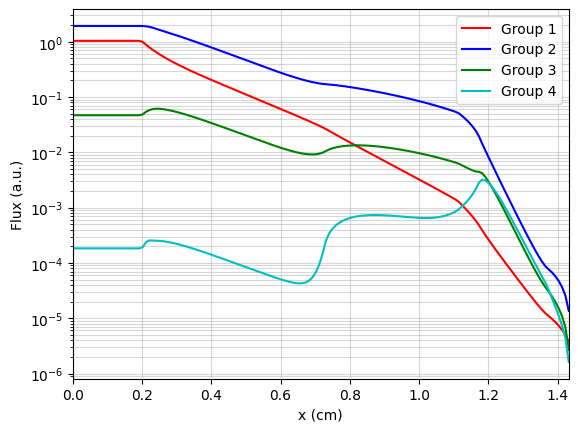

In [34]:
total_size = sum([r[0] for r in regions])
x_interp = np.linspace(0,total_size, 150)
ad_pn.solution = solution_upscatter
ad_f     = np.array([ad_pn.interpolate_solution(x_interp, k=0, energy_group = eg ) for eg in range(4)]).T

colors   = ['r', 'b', 'g', 'c']
labels   = ['Group 1', 'Group 2', 'Group 3', 'Group 4']
tritium_xs          = jnp.array(aux_data_dict['BreedingZone']['nt'])

for i in range(4):    
    plt.semilogy(x_interp, ad_f[:, i]  , color=colors[i], linestyle='-', label = labels[i])

plt.xlim(0.0, total_size)
plt.grid(which='both', alpha=0.5)
plt.xlabel('x (cm)')
plt.ylabel('Flux (a.u.)')
_ = plt.legend()

### Optimization using adjoint gradients

We want to define the following optimization problem:

$$ \text{min} \  h_{bz} + h_{shield} $$

subject to (relatively arbitrary constraints)

$$ \text{Edge Fast Flux} < 10^{-6}$$
$$ \text{Tritium Breeding} > 0.2 $$

First, we define some optimization settings that will not be modified during the optimization:

In [35]:
@dataclass(frozen=True)
class StaticOptSettings:
    elements_until_bz : int
    elements_bz       : int
    
    elements_until_shield : int
    elements_shield       : int

@jax.tree_util.register_dataclass
@dataclass(frozen=True)
class ArrayOptSettings:
    tritium_xs : jnp.ndarray

Then, to make life a bit easier; we define a few functions to compute the residuals and A,b matrices as a function of the optimization variable $\theta$:

In [36]:
from jax_pn.ADPN import residualPN
# Defining residuals and matrix as a function of theta only:
def compute_parameters(theta, base_parameters : Dict, static_opt_settings : StaticOptSettings, array_opt_settings : ArrayOptSettings, global_settings : GlobalSettings, matrix_settings : MatrixSettings):
    parameters_new = base_parameters.copy()
    
    h_i_mod = parameters_new['h_i'].copy()
    
    h_i_mod = h_i_mod.at[static_opt_settings.elements_until_bz    : static_opt_settings.elements_until_bz     + static_opt_settings.elements_bz    ].set(theta[0] / static_opt_settings.elements_bz)
    h_i_mod = h_i_mod.at[static_opt_settings.elements_until_shield: static_opt_settings.elements_until_shield + static_opt_settings.elements_shield].set(theta[1] / static_opt_settings.elements_shield)
    parameters_new['h_i'] = h_i_mod

    return parameters_new

def compute_A_b(theta, base_parameters : Dict, static_opt_settings : StaticOptSettings, array_opt_settings : ArrayOptSettings, global_settings : GlobalSettings, matrix_settings : MatrixSettings):
    parameters_mod = compute_parameters(theta, base_parameters, static_opt_settings, array_opt_settings, global_settings, matrix_settings)    
    return jax_pn.ADPN.assemble_multigroup_system(global_settings, matrix_settings, parameters_mod, "reflective", "vacuum")

def residualPN_opt(theta, base_parameters : Dict, static_opt_settings : StaticOptSettings, array_opt_settings : ArrayOptSettings, global_settings : GlobalSettings, matrix_settings : MatrixSettings, solution : jnp.ndarray):
    parameters_mod = compute_parameters(theta, base_parameters, static_opt_settings, array_opt_settings, global_settings, matrix_settings)
    return residualPN(        global_settings, matrix_settings, parameters_mod, solution, "reflective", "vacuum")


Three objective functions $f$ are defined (and a convenience function that takes the log10)

In [37]:
# Objective functions:
def thickness(theta : jnp.ndarray, base_parameters : Dict, static_opt_settings : StaticOptSettings, array_opt_settings : ArrayOptSettings, global_settings : GlobalSettings, matrix_settings : MatrixSettings, solution : jnp.ndarray)-> float:
    return jnp.sum(theta)

def edge_fast_flux_ad(theta, base_parameters : Dict, static_opt_settings : StaticOptSettings, array_opt_settings : ArrayOptSettings, global_settings : GlobalSettings, matrix_settings : MatrixSettings, solution : jnp.ndarray):    
    return solution[global_settings.right_dof]

def tritium_breeding_ad(theta, base_parameters : Dict, static_opt_settings : StaticOptSettings, array_opt_settings : ArrayOptSettings, global_settings : GlobalSettings, matrix_settings : MatrixSettings, solution : jnp.ndarray):    
    bz_elements_offset = static_opt_settings.elements_until_bz
    bz_elements_total  = static_opt_settings.elements_bz
    parameters_mod     = compute_parameters(theta, base_parameters, static_opt_settings, array_opt_settings, global_settings, matrix_settings)
    
    Ii         = jnp.sum(matrix_settings.mass_matrix, axis=0)            
    sol        = solution.reshape((global_settings.n_energy_groups, global_settings.n_moments, -1))                    
    def element_sum(i):
        return jnp.sum(sol[:, 0, matrix_settings.elem_dof_matrix[i]] * Ii[None, :] , axis = 1) * parameters_mod["h_i"][i]    
    elem_sums = jnp.sum(jax.vmap(element_sum)(jnp.arange(bz_elements_offset, bz_elements_total + bz_elements_offset)), axis=0)  * tritium_xs * 1e2

    return jnp.sum(elem_sums) 

def log_edge_fast_flux_ad(theta, base_parameters : Dict, static_opt_settings : StaticOptSettings, array_opt_settings : ArrayOptSettings, global_settings : GlobalSettings, matrix_settings : MatrixSettings, solution : jnp.ndarray):
    return jnp.log10(edge_fast_flux_ad(theta, base_parameters, static_opt_settings, array_opt_settings, global_settings, matrix_settings, solution))

residual_pn_jit_opt       = jax.jit(residualPN_opt,        static_argnums=(2,4))  
thickness_ad_jit          = jax.jit(thickness          ,   static_argnums=(2,4))  
tbr_ad_jit                = jax.jit(tritium_breeding_ad,   static_argnums=(2,4))
eff_ad_jit                = jax.jit(edge_fast_flux_ad,     static_argnums=(2,4))  
log_edge_fast_flux_ad_jit = jax.jit(log_edge_fast_flux_ad, static_argnums=(2,4))  # JIT compile the log edge flux function    

Here, we implement the adjoint implicit method, where both $f(\theta)$ and $df/d\theta$ are calculated in one single function for arbitrary objective functions (i.e. both objectives and constraints)

In [38]:

def Compute_Full(theta, base_parameters : Dict, static_opt_settings : StaticOptSettings,  array_opt_settings : ArrayOptSettings, global_settings : GlobalSettings, matrix_settings : MatrixSettings, f_obj : List, df_dtheta : List, df_dx : List):    

    # Forward Pass
    A,b       = compute_A_b(theta, base_parameters, static_opt_settings, array_opt_settings, global_settings, matrix_settings)    
    solution  = sp.linalg.spsolve(A.tocsr(), b.todense())
    
    # Computing f(theta)
    f_values = [f_obj_i(theta, base_parameters, static_opt_settings, array_opt_settings, global_settings, matrix_settings, solution) for f_obj_i in f_obj]

    # Adjoint Pass
    AT = A.T.tocsr()
    
    # Computing adjoints for each objective function
    lambda_T = [sp.linalg.spsolve(AT, dfdx_i(theta, base_parameters, static_opt_settings, array_opt_settings, global_settings, matrix_settings, solution)) for dfdx_i in df_dx]

    # Computing the lambda_T . dr / dtheta  Jacobian vector product
    res_theta = lambda theta_i : residual_pn_jit_opt(theta_i, base_parameters, static_opt_settings, array_opt_settings, global_settings, matrix_settings, solution)
    _, vjp_theta = jax.vjp(res_theta, theta)

    lambda_T_dr_dtheta = [vjp_theta(adjoint_i)[0] for adjoint_i in lambda_T] 

    df_dtheta_val = [df_dtheta_i(theta, base_parameters, static_opt_settings, array_opt_settings, global_settings, matrix_settings, solution) for df_dtheta_i in df_dtheta]
    
    total_df_dtheta = [df_dtheta_i - lambda_0_T_dr_dtheta_i for df_dtheta_i, lambda_0_T_dr_dtheta_i in zip(df_dtheta_val, lambda_T_dr_dtheta)]

    return f_values , total_df_dtheta

Now, we instantiate the data classes:

In [39]:

# Defining start parameters
start_theta     = jnp.array([0.5,0.2])
base_parameters = ad_pn.parameters
global_settings = ad_pn.global_settings
matrix_settings = ad_pn.matrix_settings

static_settings = StaticOptSettings(
    elements_until_bz     = int(sum(elements_per_region[:3])),  # BreedingZone is the 4th region, so offset is sum of first 3
    elements_bz           = int(elements_per_region[3]),        # Total elements in BreedingZone
    elements_until_shield = int(sum(elements_per_region[:6])),  # VVShield is the 7th region, so offset is sum of first 6
    elements_shield       = int(elements_per_region[6])
)
array_settings = ArrayOptSettings(
    tritium_xs = jnp.array(aux_data_dict['BreedingZone']['nt'])
)

Then, a helper class is defined to cache the results after computation:

In [40]:
class BBProblem:
    def __init__(self, base_parameters, static_opt_settings, array_opt_settings, global_settings, matrix_settings, f_obj, df_dtheta, df_dx):
        self._cache_theta = None
        self._cache_result = None
        self.base_parameters = base_parameters
        self.static_opt_settings = static_opt_settings
        self.array_opt_settings = array_opt_settings            
        self.global_settings = global_settings
        self.matrix_settings = matrix_settings  
        self.f_obj = f_obj
        self.df_dtheta = df_dtheta
        self.df_dx = df_dx

    def evaluate_all(self, theta):
        theta_i = jnp.array(theta)
        if self._cache_theta is None or not jnp.allclose(theta_i, self._cache_theta):                                    
            self._cache_theta = jnp.copy(theta_i)            
            f_values, df_dtheta = Compute_Full(theta_i, self.base_parameters, self.static_opt_settings,
                                                self.array_opt_settings, self.global_settings, self.matrix_settings, self.f_obj, self.df_dtheta, self.df_dx)
            self._cache_result = (f_values[0], df_dtheta[0], f_values[1:], df_dtheta[1:])
            

        return self._cache_result

    def objective(self, x):
        obj, *_ = self.evaluate_all(x)
        return float(obj)

    def grad_objective(self, x):
        _, grad_obj, _, _ = self.evaluate_all(x)
        return jnp.array(grad_obj).astype(float)

    def constraints(self, x):
        _, _, cons, _ = self.evaluate_all(x)
        return [float(c) for c in cons]

    def jac_constraints(self, x):
        _, _, _, jac_cons = self.evaluate_all(x)
        return [jnp.array(j).astype(float) for j in jac_cons]

Since the above functions only commpute the objectives (i.e. fast flux & tbr), we convert them to constraints using a partial function:

In [44]:
from functools import partial
def Objective_to_Constraint(f, theta, base_parameters : Dict, static_opt_settings : StaticOptSettings, array_opt_settings : ArrayOptSettings, global_settings : GlobalSettings, matrix_settings : MatrixSettings, solution : jnp.ndarray, value, greater_than):
    return greater_than * f(theta, base_parameters, static_opt_settings, array_opt_settings, global_settings, matrix_settings, solution) - value * greater_than


tbr_constraint  = jax.jit(partial(Objective_to_Constraint, tbr_ad_jit, value= 1.3 /5.0, greater_than=5.0), static_argnums=(2,4))
eff_constraint  = jax.jit(partial(Objective_to_Constraint, log_edge_fast_flux_ad_jit, value= -6, greater_than=-1.0), static_argnums=(2,4))


In [45]:
# Defining objective functions

f_obj         = [thickness_ad_jit, tbr_constraint, eff_constraint]
df_dtheta_obj = [jax.jit(jax.grad(i, argnums=0), static_argnums=(2,4)) for i in f_obj]
df_dx_obj     = [jax.jit(jax.grad(i, argnums=6), static_argnums=(2,4)) for i in f_obj]

problem = BBProblem(
    base_parameters=base_parameters,
    static_opt_settings=static_settings,
    array_opt_settings=array_settings,
    global_settings=global_settings,
    matrix_settings=matrix_settings,
    f_obj=f_obj,
    df_dtheta=df_dtheta_obj,
    df_dx=df_dx_obj
)

problem.evaluate_all(start_theta)  # Initial evaluation to cache results

(Array(0.4, dtype=float64),
 Array([1., 1.], dtype=float64),
 [Array(-0.02979614, dtype=float64), Array(-1.34822844, dtype=float64)],
 [Array([ 2.75926828e+00, -3.47050953e-06], dtype=float64),
  Array([2.55653141, 8.22798213], dtype=float64)])

In [46]:
constraints = [
    {"type" : "ineq", "fun" : problem.constraints, "jac": problem.jac_constraints},
]

from scipy.optimize import minimize
start_theta = jnp.array([0.2, 0.2])  # Initial guess for the optimization variables
#problem.evaluate_all(start_theta)  # Evaluate the problem at the initial guess
aa = minimize(fun = problem.objective,
         jac = problem.grad_objective,
         x0 = start_theta,
         constraints = constraints,
         method = 'SLSQP',
         options = {'disp': True, 'ftol': 1e-6, 'maxiter': 100},
         bounds = [(0.0, None), (0.0, None)]
)
print(aa.x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5715546954191693
            Iterations: 3
            Function evaluations: 3
            Gradient evaluations: 3
[0.2111482 0.3604065]


In [47]:
@dataclass(frozen=True)
class BBSetup:
    base_parameters: Dict
    static_opt_settings: StaticOptSettings
    array_opt_settings: ArrayOptSettings
    global_settings: GlobalSettings
    matrix_settings: MatrixSettings


BB1 = BBSetup(
    base_parameters=base_parameters,
    static_opt_settings=static_settings,
    array_opt_settings=array_settings,
    global_settings=global_settings,
    matrix_settings=matrix_settings
)

In [49]:
def evaluate_max_tbr(bbsetup : BBSetup, ff_constraint_value : float, d_constraint_value : float, tbr_function, d_function, log_eff_function):
    tbr_constraint        = partial(Objective_to_Constraint, tbr_function,     value = 0.0,                 greater_than= -5.0)
    eff_constraint        = partial(Objective_to_Constraint, log_eff_function, value = ff_constraint_value, greater_than= -1.0)
    d_constraint          = partial(Objective_to_Constraint, d_function,       value = d_constraint_value,  greater_than= -1.0)
    f_obj = [tbr_constraint, eff_constraint, d_constraint]
    df_dtheta_obj = [jax.jit(jax.grad(i, argnums=0), static_argnums=(2,4)) for i in f_obj]
    df_dx_obj     = [jax.jit(jax.grad(i, argnums=6), static_argnums=(2,4)) for i in f_obj]

    problem_i = BBProblem(base_parameters=bbsetup.base_parameters,
              static_opt_settings=bbsetup.static_opt_settings,
              array_opt_settings=bbsetup.array_opt_settings,
              global_settings=bbsetup.global_settings,
              matrix_settings=bbsetup.matrix_settings,
              f_obj=f_obj,
              df_dtheta=df_dtheta_obj,
              df_dx=df_dx_obj
              )
    constraints_i = [
        {"type" : "ineq", "fun" : problem_i.constraints, "jac": problem_i.jac_constraints},
    ]
    start_theta = jnp.array([0.2, 0.2])  # Initial guess for the optimization variables
    aa = minimize(fun = problem_i.objective,
         jac = problem_i.grad_objective,
         x0 = start_theta,
         constraints = constraints_i,
         method = 'SLSQP',
         options = {'disp': True, 'ftol': 1e-6, 'maxiter': 100},
         bounds = [(1e-5, None), (1e-5, None)]
    )
    return aa.x, problem_i.objective(aa.x)
    
theta, f_obj = evaluate_max_tbr(BB1, ff_constraint_value= - 6, d_constraint_value=0.9, tbr_function=tbr_ad_jit, d_function=thickness_ad_jit, log_eff_function=log_edge_fast_flux_ad_jit)
print(theta, f_obj)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -1.723867184295451
            Iterations: 3
            Function evaluations: 3
            Gradient evaluations: 3
[0.68911807 0.21088193] -1.723867184295451


In [ ]:
def create_pareto_front(d):
    fast_fluxes = np.log10(np.logspace(-8, -5, 15))
    
    pareto_front = []
    for i in fast_fluxes:
        print(f"Evaluating fast flux constraint value: {i}, {d}")    
        pareto_front.append(evaluate_max_tbr(BB1, ff_constraint_value=i, d_constraint_value=d, tbr_function=tbr_ad_jit, d_function=thickness_ad_jit, log_eff_function=log_edge_fast_flux_ad_jit))
        print("Result: ",  pareto_front[-1][0], " Objective value: ", -pareto_front[-1][1])
    return pareto_front


In [ ]:
ds = [0.7, 0.8, 0.9, 1.0, 1.1, 1.2]
pareto_fronts = [create_pareto_front(dvalue) for dvalue in ds]


Evaluating fast flux constraint value: -8.0, 0.7
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.030225081096920018
            Iterations: 3
            Function evaluations: 3
            Gradient evaluations: 3
Result:  [0.04926104 0.65073896]  Objective value:  -0.030225081096920018
Evaluating fast flux constraint value: -7.785714285714286, 0.7
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.054476102466234744
            Iterations: 3
            Function evaluations: 3
            Gradient evaluations: 3
Result:  [0.08756599 0.61243401]  Objective value:  -0.054476102466234744
Evaluating fast flux constraint value: -7.571428571428571, 0.7
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.07656210294656803
            Iterations: 3
            Function evaluations: 3
            Gradient evaluations: 3
Result:  [0.12586861 0.57413139]  Objective valu

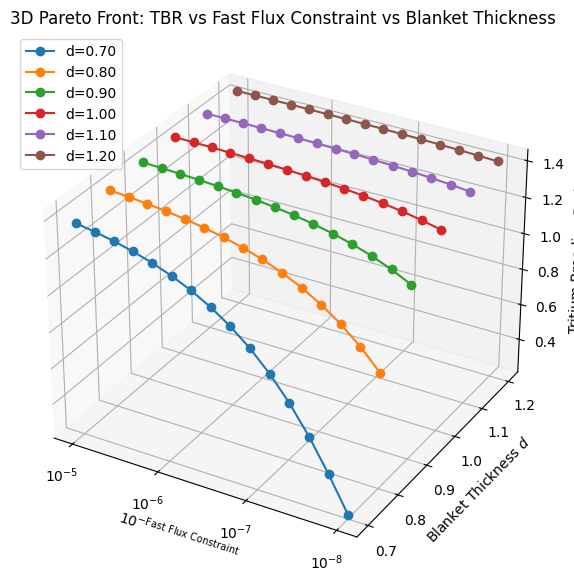

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fast_fluxes = np.log10(np.logspace(-8, -5, 15))
def plot_3d_pareto_front(pareto_fronts, ds, fast_fluxes):
    """
    pareto_fronts: list of pareto_front lists, one for each d in ds
    ds: list of d values (e.g. blanket thicknesses)
    fast_fluxes: array of fast flux constraint values (should match inner length of pareto_fronts)
    """
    renorm = 1.4 / 0.18
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    fast_fluxes = np.log10(np.logspace(-8, -5, 15))

    for i, (pareto_front, dvalue) in enumerate(zip(pareto_fronts, ds)):
        pareto_tbr = -np.array([item[1] for item in pareto_front]) * renorm
        # X: -log10(fast_flux), Y: dvalue, Z: pareto_tbr
        X = -np.array(fast_fluxes)
        Y = np.full_like(X, dvalue)
        Z = pareto_tbr
        ax.plot(X, Y, Z, marker='o', label=f'd={dvalue:.2f}')

    # Set axis labels
    ax.set_xlabel(r'$10^{-\mathrm{Fast\ Flux\ Constraint}}$')
    ax.set_ylabel('Blanket Thickness $d$')
    ax.set_zlabel('Tritium Breeding Ratio')

    # Set x-ticks as whole numbers, labeled as 10^{-tick}
    xticks = np.arange(int(np.ceil(min(-np.array(fast_fluxes)))), int(np.floor(max(-np.array(fast_fluxes)))) + 1)
    ax.set_xticks(xticks)
    ax.set_xticklabels([rf'$10^{{-{int(tick)}}}$' for tick in xticks])

    ax.legend()
    plt.title("3D Pareto Front: TBR vs Fast Flux Constraint vs Blanket Thickness")
    plt.show()

plot_3d_pareto_front(pareto_fronts, ds, fast_fluxes)

Objective:

$$\text{max}_{h_{\text{bz}}, h_{\text{shield}}}\ \text{TBR}$$
subject to constraints:
$$ h_{\text{bz}} +  h_{\text{shield}} < d$$
$$ \text{Edge Fast Flux} < FFC$$



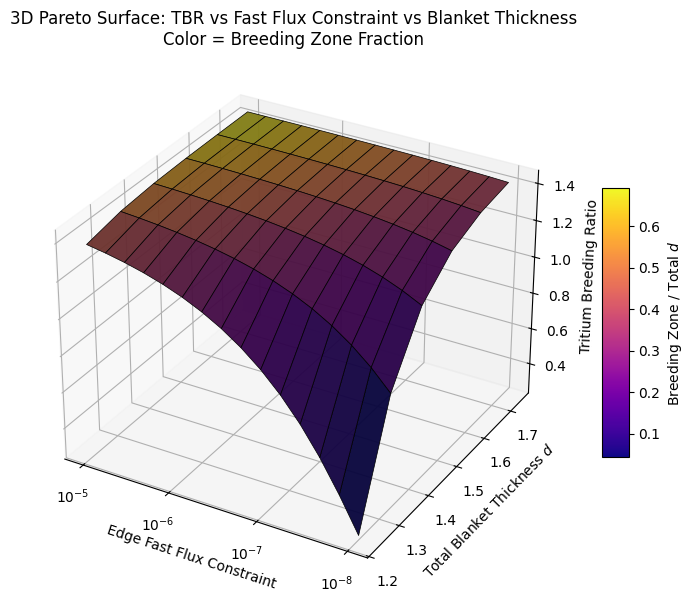

In [ ]:
def plot_3d_pareto_surface_with_bz_ratio(pareto_fronts, ds, fast_fluxes):
    """
    Plot a 3D surface for the Pareto fronts, coloring by the ratio of breeding zone thickness to total d.
    pareto_fronts: list of pareto_front lists, one for each d in ds
    ds: list of d values (e.g. blanket thicknesses)
    fast_fluxes: array of fast flux constraint values (should match inner length of pareto_fronts)
    """
    ds = np.array(ds) + 0.025 + 2 * 0.06 + 0.385 + 0.002
    renorm = 1.4 / 0.18
    # Prepare Z (TBR), X (-log10(fast_flux)), Y (d)
    Z = np.array([[-item[1] * renorm for item in pf] for pf in pareto_fronts])  # shape (len(ds), len(fast_fluxes))
    X = -np.array(fast_fluxes)  # shape (len(fast_fluxes),)
    Y = np.array(ds)            # shape (len(ds),)

    X_grid, Y_grid = np.meshgrid(X, Y)

    # Compute the breeding zone thickness for each point
    bz_thickness = np.array([[item[0][0] if isinstance(item[0], (np.ndarray, list)) else item[0] for item in pf] for pf in pareto_fronts])
    bz_ratio = bz_thickness / Y[:, None]

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Normalize bz_ratio for colormap
    norm = plt.Normalize(np.nanmin(bz_ratio), np.nanmax(bz_ratio))
    colors = plt.cm.plasma(norm(bz_ratio))

    # Plot surface with facecolors set by bz_ratio
    surf = ax.plot_surface(X_grid, Y_grid, Z, facecolors=colors, edgecolor='k', alpha=0.95, linewidth=0.5, antialiased=True)

    # Set axis labels
    ax.set_xlabel(' Edge Fast Flux Constraint')
    ax.set_ylabel('Total Blanket Thickness $d$')
    ax.set_zlabel('Tritium Breeding Ratio')

    # Set x-ticks as whole numbers, labeled as 10^{-tick}
    xticks = np.arange(int(np.ceil(np.min(X))), int(np.floor(np.max(X))) + 1)
    ax.set_xticks(xticks)
    ax.set_xticklabels([rf'$10^{{-{int(tick)}}}$' for tick in xticks])

    # Add colorbar for bz_ratio, explicitly pass ax
    mappable = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
    mappable.set_array(bz_ratio)
    fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10, label='Breeding Zone / Total $d$')

    plt.title("3D Pareto Surface: TBR vs Fast Flux Constraint vs Blanket Thickness\nColor = Breeding Zone Fraction")
    plt.show()

plot_3d_pareto_surface_with_bz_ratio(pareto_fronts, ds, fast_fluxes)